# Задача
А/А-тестирование мобильного приложения. Необходимо посчитать результаты A/A-теста, проверяя метрику качества FPR (будем проверять на конверсии в покупку). Известно, что сплит-система сломана. Требуется проверить утверждение о поломке и найти ее причины, если сплит-система действительно сломана

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

In [4]:
df = pd.read_csv('hw_aa.csv', sep=';')

In [24]:
var0 = df.query("experimentVariant == 0")['purchase']

In [25]:
var1 = df.query("experimentVariant == 1")['purchase']

  0%|          | 0/1000 [00:00<?, ?it/s]

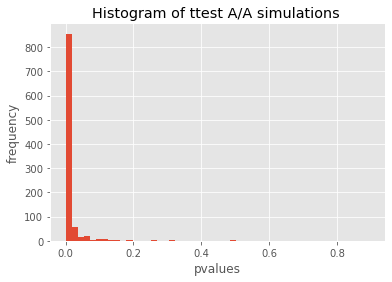

0.928

In [26]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = var0.sample(n_s, replace = False).values
    s2 = var1.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

Как видим А/А тест при разделении только по варианту эксперимента не сходится.


In [61]:
# проверим нашу выборку на дисбаланс в группах
print(df.query("experimentVariant == 0").version.value_counts())
print(df.query("experimentVariant == 1").version.value_counts())

v2.8.0      41283
v2.9.0      11921
v3.8.0.0     5694
v3.7.4.0     4204
Name: version, dtype: int64
v2.8.0      41552
v2.9.0      12033
v3.8.0.0     6110
v3.7.4.0     4221
Name: version, dtype: int64


Дисбаланса в группах по версии приложения нет.

Попробуем провести ещё несколько А/А тестов, предварительно создав тестовые группы с одинаковой версией приложения.

In [46]:
v0v280 = df.query("experimentVariant == 0 and version == 'v2.8.0'")['purchase']

v0v290 = df.query("experimentVariant == 0 and version == 'v2.9.0'")['purchase']

v0v380 = df.query("experimentVariant == 0 and version == 'v3.8.0.0'")['purchase']

v0v374 = df.query("experimentVariant == 0 and version == 'v3.7.4.0'")['purchase']

In [62]:
v1v280 = df.query("experimentVariant == 1 and version == 'v2.8.0'")['purchase']

v1v290 = df.query("experimentVariant == 1 and version == 'v2.9.0'")['purchase']

v1v380 = df.query("experimentVariant == 1 and version == 'v3.8.0.0'")['purchase']

v1v374 = df.query("experimentVariant == 1 and version == 'v3.7.4.0'")['purchase']

  0%|          | 0/1000 [00:00<?, ?it/s]

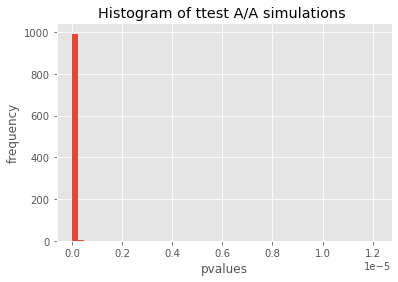

1.0

In [47]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v0v280.sample(n_s, replace = False).values
    s2 = v1v280.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

  0%|          | 0/1000 [00:00<?, ?it/s]

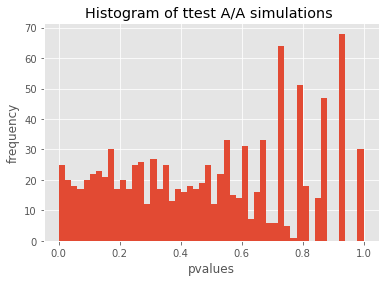

0.051

In [48]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v0v290.sample(n_s, replace = False).values
    s2 = v1v290.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

  0%|          | 0/1000 [00:00<?, ?it/s]

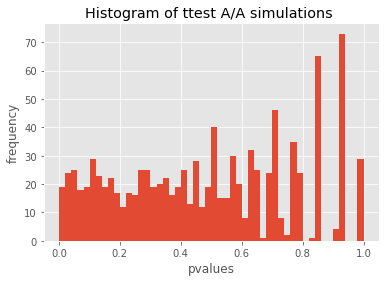

0.051

In [49]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v0v380.sample(n_s, replace = False).values
    s2 = v1v380.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

  0%|          | 0/1000 [00:00<?, ?it/s]

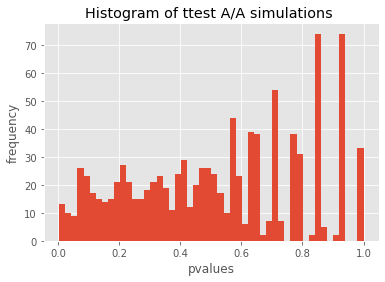

0.027

In [50]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = v0v374.sample(n_s, replace = False).values
    s2 = v1v374.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

как видно из полученных результатов ошибка сплитования происходит на версии v2.8.0. А т.к. пользователей с этой версией приложения больше 50% от общего количества, то это сильно влияет на весь результат.

Исключим результаты с данной версией из общей таблицы и повторим А/А тест.

In [66]:
qdf = df.query("version != 'v2.8.0'")

In [67]:
var0 = qdf.query("experimentVariant == 0")['purchase']

In [68]:
var1 = qdf.query("experimentVariant == 1")['purchase']

  0%|          | 0/1000 [00:00<?, ?it/s]

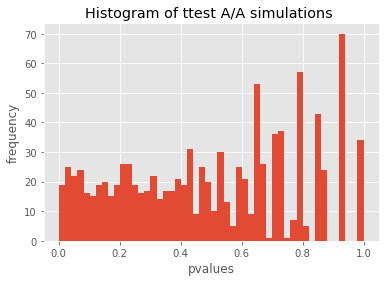

0.049

In [69]:
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = var0.sample(n_s, replace = False).values
    s2 = var1.sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

Вуаля, теперь А/А тест сходится.

## Выводы:

На основе результатов А/А теста можно делать выводы о качестве работы нашей сплит-системы.
В данном случае была проблема со сплитованием пользователей на одной из версий приложения. Если это починить (или не учитывать, как временный вариант) то тогда мы можем проводить А/В тесты используя нашу сплит-систему